<center> 
    <H1>Udemy Data Analysis Project</H1>
</center>

<hr>



 <center><H2>Overview</H2></center>
 
- In this project, we are analyzing the Udemy courses dataset to gain insights into various aspects such as course availability by subject, paid vs free courses, top enrolled courses, course levels, and more. The analysis is conducted using **Pandas**, **Matplotlib**, and **Seaborn** for visualization.

<hr>
<Center><H1> 1. Data Loading and Preprocessing </H1></center>
<hr>

In [1]:
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv('Udemy_data.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
# Check for missing values in the dataset
data.isnull()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3677,False,False,False,False,False,False,False,False,False,False,False
3678,False,False,False,False,False,False,False,False,False,False,False
3679,False,False,False,False,False,False,False,False,False,False,False
3680,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Sum of missing values in each column
data.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<hr>
<center><H1>Exploring the Dataset
</H1></center>
<hr>

## 2.1 What are the different subjects for which Udemy is offering courses?

In [6]:
# Display unique subjects offered in the dataset
data.subject.unique()


array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

## 2.2 Which subject has the maximum number of courses?


In [7]:
# Count the number of courses available in each subject
data.subject.value_counts()


Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

## 2.3 Show all the courses that are free of cost

In [8]:
# Filter and display courses that are free
data[data.is_paid == False]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15T00:21:56Z,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18T17:01:40Z,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03T17:45:31Z,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments


## 2.4 Show all the courses that are paid


In [9]:
# Filter and display courses that are paid
data[data.is_paid == True]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development


## 2.5 Top 5 most enrolled courses


In [10]:
# Sort courses by number of subscribers and display the top 5
data.sort_values('num_subscribers', ascending=False).head(5)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development


## 2.6 Top 10 least enrolled courses

In [11]:
# Sort courses by number of subscribers in ascending order and display the top 10
data.sort_values('num_subscribers', ascending=True).head(10)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
649,1233314,Building a Balanced Scorecard,True,50,0,0,11,Intermediate Level,2 hours,2017-07-03T21:38:22Z,Business Finance
3259,1232282,The Cash Flow Statement - An Introduction,True,50,0,0,10,Beginner Level,1.5 hours,2017-06-28T16:05:51Z,Business Finance
3261,1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2 hours,2017-07-03T17:39:57Z,Graphic Design
910,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18T17:56:36Z,Graphic Design
3328,715476,The Cuckoo Strategy to get European Funding,True,160,0,0,6,All Levels,1 hour,2016-01-06T02:38:23Z,Business Finance
1325,1187084,Forex how traders beat the markest with little...,True,100,0,0,16,All Levels,1 hour,2017-07-06T21:16:13Z,Business Finance
2596,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,37 mins,2014-04-15T21:48:55Z,Graphic Design
2597,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,37 mins,2014-04-15T21:48:55Z,Graphic Design
848,1232390,Corporate Ethics,True,100,0,0,13,Beginner Level,3.5 hours,2017-07-03T21:39:13Z,Business Finance
2900,995384,Professional Business Logo Design Using Free O...,True,20,0,0,5,All Levels,37 mins,2016-10-31T16:09:48Z,Graphic Design


## 2.7 Show courses with zero enrollments

In [12]:
# Filter courses with zero subscribers
data[data.num_subscribers == 0]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
37,1234656,4 Week Rhythm Mastery,True,20,0,0,28,Beginner Level,2.5 hours,2017-07-05T16:07:44Z,Musical Instruments
44,1231958,60 Minutes to Fundamental Accounting Skills,True,75,0,0,9,Beginner Level,2.5 hours,2017-06-28T21:55:29Z,Business Finance
91,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,True,20,0,0,5,Beginner Level,31 mins,2017-07-06T16:12:34Z,Musical Instruments
98,1219820,Accounting - The 6 most important rules you mu...,True,20,0,0,9,All Levels,1 hour,2017-05-25T21:55:50Z,Business Finance
185,872262,Adobe Photoshop pentru Social Media,True,20,0,0,12,Beginner Level,34 mins,2016-06-08T16:02:39Z,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...
3467,1214670,Tune that Sour Note on Your Piano,True,20,0,0,6,All Levels,33 mins,2017-06-20T21:46:40Z,Musical Instruments
3512,1251654,Understand Core Finance Principles in 60 Minutes,True,75,0,0,13,Beginner Level,2.5 hours,2017-06-29T22:04:17Z,Business Finance
3515,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1 hour,2016-12-15T14:56:17Z,Business Finance
3516,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1 hour,2016-12-15T14:56:17Z,Business Finance


## 2.8 List all Web Development courses where the price is above 100


In [13]:
# Filter Web Development courses with price greater than 100
data[(data.subject == 'Web Development') & (data.price > '100')]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
12,64422,1 Hour HTML,True,200,16212,514,20,Beginner Level,1 hour,2013-07-09T03:16:26Z,Web Development
13,63612,1 Hour JavaScript,True,200,22999,602,18,Beginner Level,1 hour,2013-07-04T15:27:02Z,Web Development
24,975916,17 Complete JavaScript projects explained st...,True,185,327,26,106,Beginner Level,9.5 hours,2016-10-26T14:03:38Z,Web Development
34,592594,3D Programming with WebGL and Babylon.js for B...,True,200,549,49,18,Intermediate Level,2 hours,2015-08-31T21:07:26Z,Web Development
56,304490,A 13 Hour SQL Server 2014 /ASP.NET/CSS/C#/jQue...,True,35,4183,231,86,Intermediate Level,14 hours,2014-10-12T06:29:05Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
3665,968304,XQUERY :basics for beginners,True,40,937,2,6,All Levels,38 mins,2016-09-27T15:26:05Z,Web Development
3666,969170,XSD :basics for beginners,True,35,755,0,7,All Levels,42 mins,2016-09-27T18:01:26Z,Web Development
3667,968278,XSLT :basics for beginners,True,35,877,6,7,All Levels,32 mins,2016-09-27T15:14:59Z,Web Development
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development


## 2.9 List all courses related to Python


In [14]:
# Filter courses that mention Python in their title
len(data[data.course_title.str.contains('Python')])


29

## 2.10 Find the total number of courses published in the year 2015


In [15]:
# Convert 'published_timestamp' to datetime format
data['published_timestamp'] = pd.to_datetime(data.published_timestamp)

# Extract the year from the timestamp
data['Year'] = data['published_timestamp'].dt.year

# Count the courses published in 2015
len(data[data.Year == 2015])


1014

## 2.11 What are the max number of subscribers for each level of courses?


In [16]:
# Group by course level and get the maximum number of subscribers for each
data.groupby('level')['num_subscribers'].max()


level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

## 2.12 Get the maximum values for each course level


In [17]:
# Group by level and display the maximum values for each numeric column
data.groupby('level').max()


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,subject,Year
level,,,,,,,,,,,
All Levels,1277924,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,True,Free,268923,27445,544,9.5 hours,2017-07-06 21:16:13+00:00,Web Development,2017
Beginner Level,1282064,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,True,Free,161029,5924,779,9.5 hours,2017-07-06 21:46:30+00:00,Web Development,2017
Expert Level,1275790,[Value Investing] Where White People Keep Thei...,True,95,5172,249,157,9 hours,2017-07-04 18:08:01+00:00,Web Development,2017
Intermediate Level,1276182,株式投資で本当のテクニカル分析ができるようになる,True,Free,29167,3326,320,9.5 hours,2017-07-05 04:41:54+00:00,Web Development,2017


<hr><center><h1>3. Data Visualization</h1></center><hr>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\SHUBHAM\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3.1 Distribution of Courses by Subject

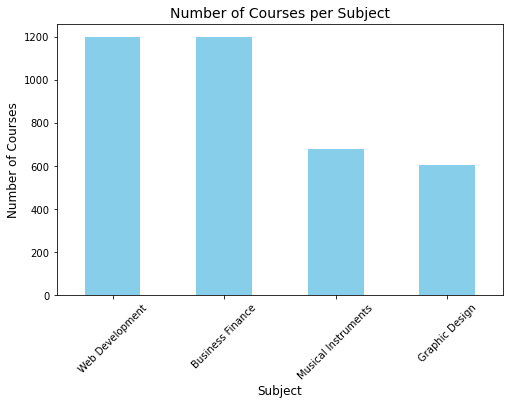

In [19]:
# Visualize the number of courses offered per subject using a bar chart
plt.figure(figsize=(8, 5))
data.subject.value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Courses per Subject', fontsize=14)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of Courses', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 3.2 Free vs Paid Courses Distribution


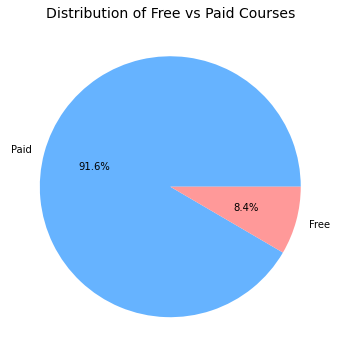

In [20]:
# Visualize the split between free and paid courses using a pie chart
labels = ['Paid', 'Free']
sizes = data.is_paid.value_counts()
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Free vs Paid Courses', fontsize=14)
plt.show()


## 3.3 Top 5 Most Subscribed Courses


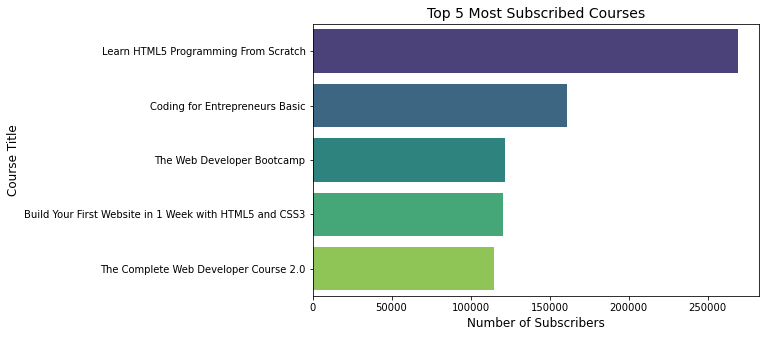

In [21]:
# Visualize the top 5 most subscribed courses using a horizontal bar chart
top_5_courses = data.sort_values('num_subscribers', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x='num_subscribers', y='course_title', data=top_5_courses, palette='viridis')
plt.title('Top 5 Most Subscribed Courses', fontsize=14)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12)
plt.show()


## 3.4 Enrollment by Course Level


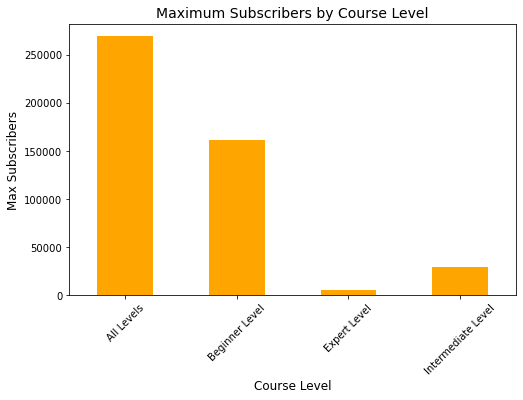

In [22]:
# Visualize the maximum number of subscribers for each course level using a bar chart
level_max_subs = data.groupby('level')['num_subscribers'].max()

plt.figure(figsize=(8, 5))
level_max_subs.plot(kind='bar', color='orange')
plt.title('Maximum Subscribers by Course Level', fontsize=14)
plt.xlabel('Course Level', fontsize=12)
plt.ylabel('Max Subscribers', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<hr><center><H1>4. Conclusion</H1><center><hr>


# In this analysis, we explored various aspects of Udemy’s course offerings. We looked into:

- The distribution of subjects available.
- The comparison between paid and free courses.
- Trends in course enrollments, focusing on the top and least subscribed courses.
- Insights into courses based on their levels and Python-related offerings.

These findings help us understand the course landscape on Udemy and identify patterns in course offerings, pricing, and popularity.

<hr><center><H2>Summary of Section</H2></center><hr>


1. **Data Loading and Preprocessing**: Explains how the data is loaded and checked for missing values.
2. **Exploring the Dataset**: A series of questions that uncover key insights like subject distribution, course types (free/paid), and top courses.
3. **Data Visualization**: Different visualization techniques to understand trends, such as course distribution, free vs paid courses, and enrollments by course level.
4. **Conclusion**: A wrap-up of the analysis and the insights gained from it.

